# Explorative Datenanalyse

Import Librarys

In [228]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Import data

In [229]:
abloeseZone1Raw = pd.read_csv('..\data\out_1.csv')
abloeseZone2Raw = pd.read_csv('..\data\out_2.csv')

Erste inspektion der Daten

In [230]:
print(abloeseZone1Raw.head())
print(abloeseZone2Raw.head())

        Datum Uhrzeit  Masse [kg]  Geschwindigkeit [m/s]  Unnamed: 4  \
0  2019-01-01   09:00       194.0                    8.4         NaN   
1  2019-01-01   21:00       224.0                    8.8         NaN   
2  2019-01-02   14:00      3104.0                    9.2         NaN   
3  2019-01-04   15:00       228.0                    8.0         NaN   
4  2019-01-05   23:00       755.0                    7.0         NaN   

   Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  \
0         NaN         NaN         NaN         NaN         NaN  ...   
1         NaN         NaN         NaN         NaN         NaN  ...   
2         NaN         NaN         NaN         NaN         NaN  ...   
3         NaN         NaN         NaN         NaN         NaN  ...   
4         NaN         NaN         NaN         NaN         NaN  ...   

   Unnamed: 67  Unnamed: 68  Unnamed: 69  Unnamed: 70  Unnamed: 71  \
0          NaN          NaN          NaN          NaN          NaN   
1     

## Die überfüssigen Spalten bereinigen

In [231]:
abloeseZone1 = abloeseZone1Raw[["Datum", "Uhrzeit", "Masse [kg]", "Geschwindigkeit [m/s]"]]
abloeseZone2 = abloeseZone2Raw[["Date", "Uhrzeit", "m [kg]", "v [m/s]"]]

Inspektion

In [232]:
print(abloeseZone1.head())
print(abloeseZone2.head())

        Datum Uhrzeit  Masse [kg]  Geschwindigkeit [m/s]
0  2019-01-01   09:00       194.0                    8.4
1  2019-01-01   21:00       224.0                    8.8
2  2019-01-02   14:00      3104.0                    9.2
3  2019-01-04   15:00       228.0                    8.0
4  2019-01-05   23:00       755.0                    7.0
         Date Uhrzeit  m [kg]  v [m/s]
0  2019-01-01   09:00    38.0     45.4
1  2019-01-03   06:00   187.0     41.6
2  2019-01-04   10:00    36.0     44.6
3  2019-01-07   14:00     6.0     41.2
4  2019-01-11   06:00    65.0     39.6


Vereinheitlichung der Spaltennamen

In [233]:
abloeseZone1.columns=["Datum", "Uhrzeit", "Masse", "Geschwindikeit"]
abloeseZone2.columns=["Datum", "Uhrzeit", "Masse", "Geschwindikeit"]
print(abloeseZone1.head())
print(abloeseZone2.head())

        Datum Uhrzeit   Masse  Geschwindikeit
0  2019-01-01   09:00   194.0             8.4
1  2019-01-01   21:00   224.0             8.8
2  2019-01-02   14:00  3104.0             9.2
3  2019-01-04   15:00   228.0             8.0
4  2019-01-05   23:00   755.0             7.0
        Datum Uhrzeit  Masse  Geschwindikeit
0  2019-01-01   09:00   38.0            45.4
1  2019-01-03   06:00  187.0            41.6
2  2019-01-04   10:00   36.0            44.6
3  2019-01-07   14:00    6.0            41.2
4  2019-01-11   06:00   65.0            39.6


## Fehlende Daten

In [234]:
print(abloeseZone1.isna().sum())
print(abloeseZone2.isna().sum())

Datum             11
Uhrzeit           11
Masse             11
Geschwindikeit    11
dtype: int64
Datum             3
Uhrzeit           3
Masse             3
Geschwindikeit    3
dtype: int64


In [235]:
abloeseZone1 = abloeseZone1.dropna()
abloeseZone2 = abloeseZone2.dropna()
print(abloeseZone1.isna().sum())
print(abloeseZone2.isna().sum())

Datum             0
Uhrzeit           0
Masse             0
Geschwindikeit    0
dtype: int64
Datum             0
Uhrzeit           0
Masse             0
Geschwindikeit    0
dtype: int64


Datentypen der Spalten anpassen

In [236]:
abloeseZone1["Datum"] = pd.to_datetime(abloeseZone1["Datum"])
abloeseZone1["Uhrzeit"] = pd.to_datetime(abloeseZone1["Uhrzeit"]).dt.hour
abloeseZone1.dtypes
abloeseZone2["Datum"] = pd.to_datetime(abloeseZone2["Datum"])
abloeseZone2["Uhrzeit"] = pd.to_datetime(abloeseZone2["Uhrzeit"]).dt.hour
abloeseZone2.dtypes

Datum             datetime64[ns]
Uhrzeit                    int64
Masse                    float64
Geschwindikeit           float64
dtype: object

Überblick mit .describe()

In [237]:
abloeseZone1.describe()

,Uhrzeit,Masse,Geschwindikeit
count,68.000000,68.000000,68.000000
mean,12.970588,628.632353,8.788235
std,6.508251,695.884703,1.989189
min,0.000000,12.000000,3.600000
25%,8.750000,214.750000,7.300000
50%,13.500000,402.500000,8.800000
75%,18.000000,773.000000,10.125000
max,23.000000,3104.000000,14.100000


In [238]:
abloeseZone2.describe()

,Uhrzeit,Masse,Geschwindikeit
count,32.000000,32.000000,32.000000
mean,12.062500,99.250000,37.790625
std,6.184984,104.072555,5.395778
min,1.000000,0.000000,24.900000
25%,6.750000,36.750000,33.200000
50%,11.500000,58.000000,38.750000
75%,16.250000,140.000000,41.725000
max,23.000000,406.000000,46.500000


In [239]:
abloeseZone1.head()

,Datum,Uhrzeit,Masse,Geschwindikeit
0,2019-01-01,9,194.0,8.4
1,2019-01-01,21,224.0,8.8
2,2019-01-02,14,3104.0,9.2
3,2019-01-04,15,228.0,8.0
4,2019-01-05,23,755.0,7.0


## Erste Plots

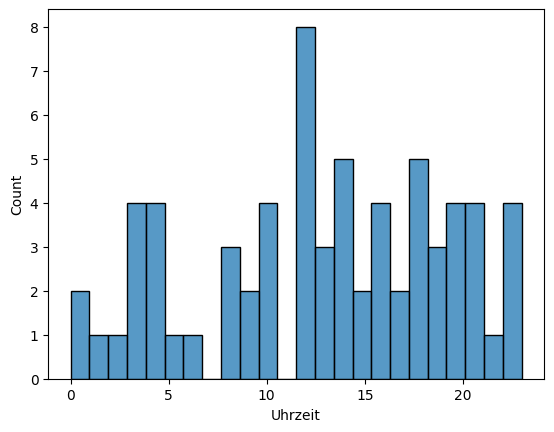

In [242]:
sns.histplot(data=abloeseZone1, x="Uhrzeit", bins=24)
plt.show()

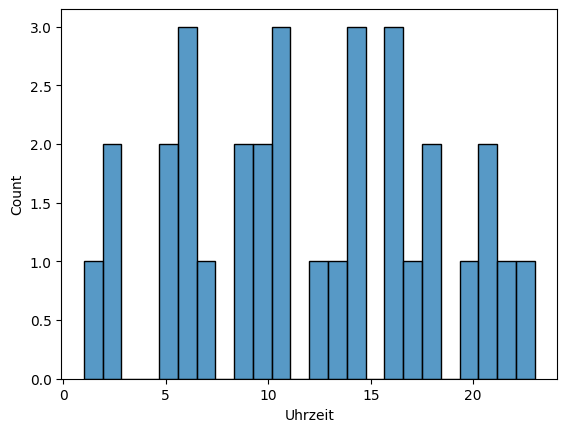

In [243]:
sns.histplot(data=abloeseZone2, x="Uhrzeit", bins=24)
plt.show()